
## Title - Nigeria COVID-19 Data Analysis using Python 

###### 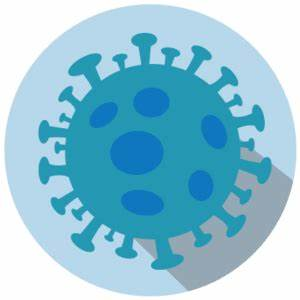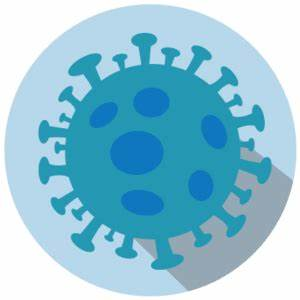
## Project Overview
#### Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus, and it has affected major parts of the world. Nigeria, a West-African country, has also been affected by the COVID-19 pandemic after recording its first case on 27th February 2020.

#### Nigeria is a country with 37 states - Federal Capital Territory included- and a fast-growing economic environment with about 200 million citizens. COVID-19 has affected several country activities as the country steadily progressed from its first case to shutting down major airports, state-wide lockdown, curfews, and reviving its economy.

### **Data Collection**
#### The data source is divided into different parts, and these data will be combined to perform analysis and provide insights.

#### **1. The Nigeria Centre for Diseases Control (NCDC)**: monitors the country’s COVID-19 situation, and releases data on metrics across all the 37 states in the country. From NCDC COVID-19 official website, performing a web extraction or web scraping, covid data was extracted.

#### **2. The Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)**: publishes daily data on confirmed, death and recovered cases across different countries. the daily data for Nigeria was extracted from their repositor.

#### **3. Nigeria Community Vulnerability Index data**
#### The vulnerability index was computed by considering several factors such as socio-economic status, population density, housing type, transportation, epidemiological, health system etc, these factors are known as themes. Each theme was broken into subthemes, and data was gathered from them to compute the overall vulnerability index score by weighing equally each theme. You can use the index data with datasets related to the pandemic such cases, deaths etc to determine relationships and correlations in your analysis.
#### **Note that:**
#### - The term “vulnerability” refers to the impact of the virus on a community after the virus arrives.
#### - It ranks from Very Low(0) to Very High(1+)


#### **4. Real Domestic Gross Product Data**
#### Data on the Real Domestic Gross Product(GDP) data for Nigeria was extracted. This aided us to determine the impact of COVID-19 on the economy. We can achieve this by comparing the Real GDP(Pre-COVID-19) with Real GDP(During COVID-19).

#### **5. State Budget Data**
#### States across the country reduced their initial budget due to the impact of COVID-19 on the economy. We will used the data provided to determine the impact of COVID-19 on the economy.


### **Importing Libraries and Data**
#### Let's start by importing the libraries we need. We will import the Numpy and pandas libraries to help us load and perform quick, vectorized operations on our data, then the Matplotlib, Seaborn and Joypy libraries to help us build informing visuals.

In [1]:

import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

##### Table from [**The Nigeria Centre for Diseases Control (NCDC)**](https://covid19.ncdc.gov.ng/) was downloaded via Excel and loaded to pandas as .csv file.



In [2]:
url = pd.read_csv('covid.csv')

In [3]:
url

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,103145,2,102372,771
1,FCT,29161,120,28792,249
2,Rivers,17755,180,17420,155
3,Kaduna,11487,20,11378,89
4,Oyo,10328,2,10124,202
5,Plateau,10309,27,10207,75
6,Edo,7821,102,7398,321
7,Ogun,5810,11,5717,82
8,Delta,5653,371,5170,112
9,Kano,5186,50,5009,127


In [4]:
url.to_csv('Nigeria_covid.csv',  index = True)

In [5]:
url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


#### Data collected from the The Johns Hopkins University Center for Systems Science and Engineering

In [6]:
url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [7]:
global_confirmed = pd.read_csv(url_1)
global_recov = pd.read_csv(url_2)
global_death = pd.read_csv(url_3)

In [8]:
global_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [9]:
global_death.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

##### Importing external data


In [10]:
url4 = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/Budget%20data.csv'
url5 = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/RealGDP.csv'
url6 = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covid_external.csv'
url7 = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covidnig.csv'

In [11]:
budget_df = pd.read_csv(url4)
gdp_df = pd.read_csv(url5)
covidExt_df= pd.read_csv(url6)
covidng_df = pd.read_csv(url7)

## Data Wrangling

### Previewing dataframe  

In [12]:
global_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [13]:
global_confirmed.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [14]:
global_recov.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
global_recov.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.4+ MB


In [16]:
global_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [17]:
budget_df.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [18]:
gdp_df.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [19]:
covidExt_df.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [20]:
covidng_df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


## Data Preparation
#### The data got from The Johns Hopkins University Center for Systems Science and Engineering is going to be cleaned and prepared first. We will be using this data to draw insight in the later stage of the project and it would be good if it isunderstandable at a glance.

#### We start by reshaping the data from the John hopkins repository:

In [21]:
#Create a reshape function
def reshape(df, name):
    """ We use pd.melt() to convert the dataframe into a long format with all dates in one column """
    return pd.melt(df, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_name=name, var_name='year')

In [22]:
#Reshape each dataframe
global_confirmed = reshape(global_confirmed, 'confirmed')
global_recov = reshape(global_recov, 'recovered')
global_death = reshape(global_death, 'death')

In [23]:
global_confirmed.head()

,Province/State,Country/Region,Lat,Long,year,confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [24]:
global_recov.head()

,Province/State,Country/Region,Lat,Long,year,recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [25]:
global_death.head()

,Province/State,Country/Region,Lat,Long,year,death
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [26]:
global_death.isnull().sum()

Province/State    226314
Country/Region         0
Lat                 2286
Long                2286
year                   0
death                  0
dtype: int64

In [27]:
global_confirmed.isnull().sum()

Province/State    226314
Country/Region         0
Lat                 2286
Long                2286
year                   0
confirmed              0
dtype: int64

In [28]:
global_death.isnull().sum()

Province/State    226314
Country/Region         0
Lat                 2286
Long                2286
year                   0
death                  0
dtype: int64

In [29]:
global_death['Province/State'].unique().tolist()

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Repatriated Travellers',
 'Saskatchewan',
 'Yukon',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Unknown',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Martinique',
 'Mayotte',
 'New Caledonia',
 'Reu

#### Using pd.merge() to combine the data set and form a single data containing all global covid_19 data record from John Hopkins repository

In [30]:
combined_df = pd.merge(global_confirmed, global_recov)
combined_df.head(3)

,Province/State,Country/Region,Lat,Long,year,confirmed,recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0


In [31]:
merged_df = pd.merge(combined_df, global_death)
merged_df.head(3)

,Province/State,Country/Region,Lat,Long,year,confirmed,recovered,death
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0


In [32]:
merged_df.to_csv('global_covid.csv', index=False)

In [33]:
merged_df.shape

(306324, 8)

In [34]:
merged_df.sort_values(by=['Country/Region', 'year'])
merged_df.head()

,Province/State,Country/Region,Lat,Long,year,confirmed,recovered,death
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0


In [35]:
print('\033[1m'+'Datatypes in the combined dataframe:'+'\033[0m')
print(covidng_df.dtypes, '\n')

Datatypes in the combined dataframe:
States Affected                 object
No. of Cases (Lab Confirmed)    object
No. of Cases (on admission)     object
No. Discharged                  object
No. of Deaths                    int64
dtype: object 



In [36]:
covidng_df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


#### Renaming columns of scraped data

In [37]:

covidng_df.rename(columns = {'No. of Cases (Lab Confirmed)':'positive_cases', 'No. of Cases (on admission)':'admission_cases', 'No. Discharged':'discharged', 'No. of Deaths':'death'}, inplace = True)


In [38]:
covidng_df.head(2)


,States Affected,positive_cases,admission_cases,discharged,death
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93


#### Here we covert daa to appropriate data type and remove comma(,)in numerical data

In [39]:
covidng_df['positive_cases'] = covidng_df['positive_cases'].str.replace(',', '').astype(float)

In [40]:
covidng_df['positive_cases'] = covidng_df['positive_cases'].astype(int)

In [41]:
covidng_df['discharged'] = covidng_df['discharged'].str.replace(',', '').astype(float)

In [42]:
covidng_df['discharged'] = covidng_df['discharged'].astype(int)

#### Extracting daily data for Nigeria from the Global daily cases data

In [43]:
globalnig = merged_df.groupby('Country/Region')

In [44]:
global_ng = globalnig.get_group('Nigeria')

In [45]:
global_ng.head()

,Province/State,Country/Region,Lat,Long,year,confirmed,recovered,death
187,NaN,Nigeria,9.082,8.6753,1/22/20,0,0,0
455,NaN,Nigeria,9.082,8.6753,1/23/20,0,0,0
723,NaN,Nigeria,9.082,8.6753,1/24/20,0,0,0
991,NaN,Nigeria,9.082,8.6753,1/25/20,0,0,0
1259,NaN,Nigeria,9.082,8.6753,1/26/20,0,0,0


In [46]:
global_ng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 187 to 306243
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  0 non-null      object 
 1   Country/Region  1143 non-null   object 
 2   Lat             1143 non-null   float64
 3   Long            1143 non-null   float64
 4   year            1143 non-null   object 
 5   confirmed       1143 non-null   int64  
 6   recovered       1143 non-null   int64  
 7   death           1143 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 80.4+ KB


#### Convert the year column to datetime data type

In [47]:
global_ng['year'] = pd.to_datetime(global_ng['year'])

In [48]:
global_ng.head(2)

,Province/State,Country/Region,Lat,Long,year,confirmed,recovered,death
187,NaN,Nigeria,9.082,8.6753,2020-01-22,0,0,0
455,NaN,Nigeria,9.082,8.6753,2020-01-23,0,0,0


In [49]:
global_ng.to_csv('global_ng.csv', index = True)

In [50]:
## We rename the column year with date for better representation
global_ng.rename(columns = {'year': 'date'}, inplace = True)

#### Getting DataFrame for Daily Confirmed Cases in Nigeria

In [51]:
daily_confirmed = global_ng[['Country/Region', 'date', 'confirmed']]

    

In [52]:
daily_confirmed.tail(100)

,Country/Region,date,confirmed
279711,Nigeria,2022-11-30,266283
279979,Nigeria,2022-12-01,266283
280247,Nigeria,2022-12-02,266283
280515,Nigeria,2022-12-03,266283
280783,Nigeria,2022-12-04,266283
...,...,...,...
305171,Nigeria,2023-03-05,266598
305439,Nigeria,2023-03-06,266598
305707,Nigeria,2023-03-07,266598
305975,Nigeria,2023-03-08,266598


#### Getting DataFrame for Daily Death Cases in Nigeria

In [53]:
daily_death = global_ng[['Country/Region', 'date', 'death']]

#### Getting DataFrame for Daily Recovered Cases in Nigeria

In [54]:
daily_recovered = global_ng[['Country/Region', 'date', 'recovered']]

## **DATA ANALYSIS**

### In this section we draw out insights fom our data and find out the impact of the COVID-19 virus in various state across the country, Nigeria.

In [55]:
global_ng['confirmed'].describe()

count      1143.000000
mean     164742.015748
std       96773.947276
min           0.000000
25%       63104.500000
50%      182503.000000
75%      256028.000000
max      266598.000000
Name: confirmed, dtype: float64

In [56]:
covidng_df.columns

Index(['States Affected', 'positive_cases', 'admission_cases', 'discharged',
       'death'],
      dtype='object')

In [57]:
# here we rename the columns for easy analysis
url.rename(columns = {'No. of Cases (Lab Confirmed)':'positive_cases', 'No. of Cases (on admission)':'admission_cases', 'No. Discharged':'discharged', 'No. of Deaths':'death'}, inplace = True)


In [58]:
url.head()

,States Affected,positive_cases,admission_cases,discharged,death
0,Lagos,103145,2,102372,771
1,FCT,29161,120,28792,249
2,Rivers,17755,180,17420,155
3,Kaduna,11487,20,11378,89
4,Oyo,10328,2,10124,202


In [59]:
covid_data = url

In [60]:
# sort out positive_cases in ascending order
confirmed_df=covid_data.sort_values(by=['positive_cases'], ascending = False).head(10)

In [61]:
confirmed_df.head()

,States Affected,positive_cases,admission_cases,discharged,death
0,Lagos,103145,2,102372,771
1,FCT,29161,120,28792,249
2,Rivers,17755,180,17420,155
3,Kaduna,11487,20,11378,89
4,Oyo,10328,2,10124,202


In [62]:
# save the data frame in local storage
confirmed_df.to_csv('confirmed.csv', index = True)

## **Top 10 states in terms of Confirmed COVID-19 cases by Laboratory test**

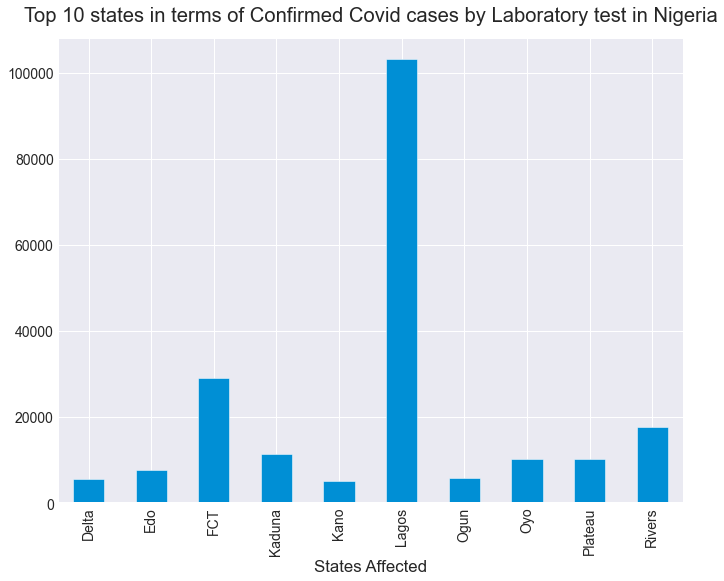

In [63]:
sns.set_style('darkgrid')
confirmed_df.groupby(['States Affected'])['positive_cases'].mean().plot.bar(figsize= (10,8)).set_title("Top 10 states in terms of Confirmed Covid cases by Laboratory test in Nigeria", y=1.02)
plt.show()

#### *From the line plot it is observed that Lagos had the highest confirmed COVID_19 cases. We then have the FCT and Rivers state also with high confirmed cases after Lagos state.*

### **Top 10 states in terms of Discharged COVID cases**

In [64]:
discharged_df= covid_data.sort_values(by=['discharged'], ascending = False).head(10)

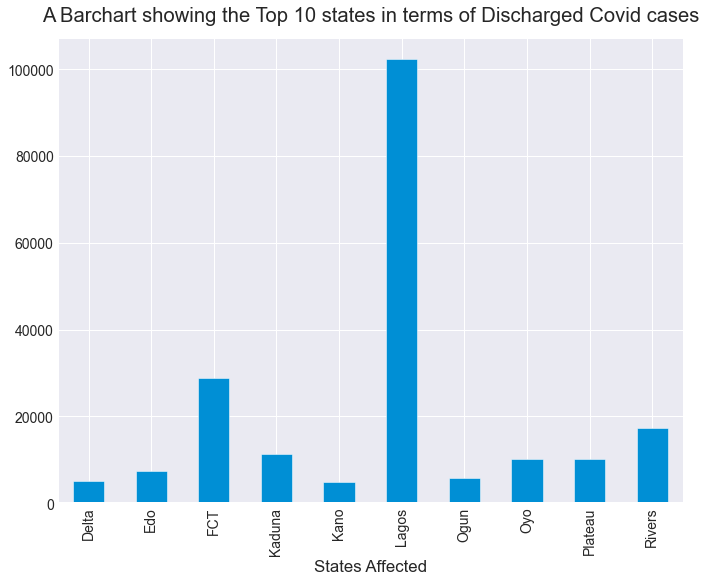

In [65]:
discharged_df.groupby(['States Affected'])['discharged'].mean().plot.bar(figsize= (10,8)).set_title( "A Barchart showing the Top 10 states in terms of Discharged Covid cases", y=1.02,) 
plt.show()

#### *Lagos state recorded the highest recovery and discharged cases accompanied by the FCT and Rivers state.*

### **COVID-19 Death cases across the states in Nigeria** 

In [66]:
death_df= covid_data.sort_values(by=['death'], ascending = False).head(10)

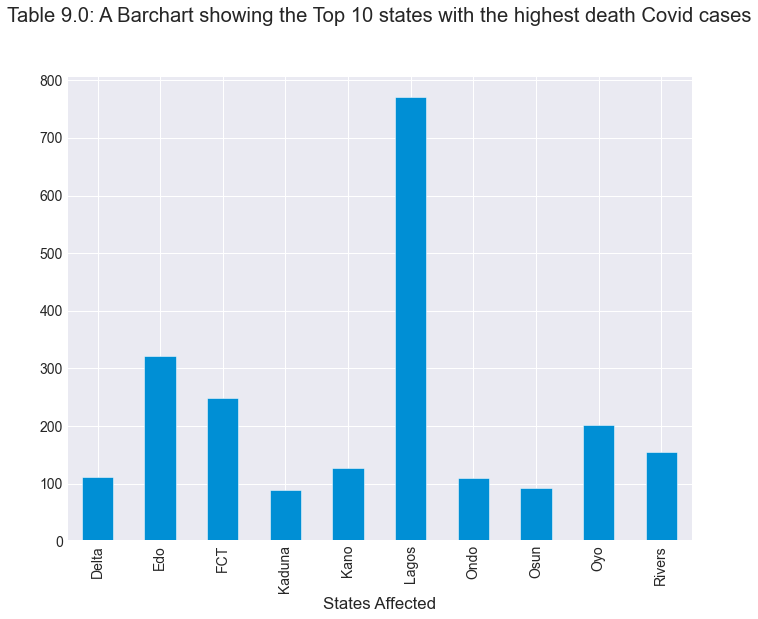

In [67]:
death_df.groupby(['States Affected'])['death'].mean().plot.bar(figsize= (10,8)).set_title("Table 9.0: A Barchart showing the Top 10 states with the highest death Covid cases", y=1.1,) 
plt.show()


#### *From the plot above, we have Lagos state having the highest death cases. Edo state accompanied Lagos to have the second highest death cases in Nigeria. The FCT, Oyo state and Rivers state have significant death cases*.

## **Analysis to demonstrate the daily confirmed, recovered and death cases**

#### First we look at the daily confirmed cases:

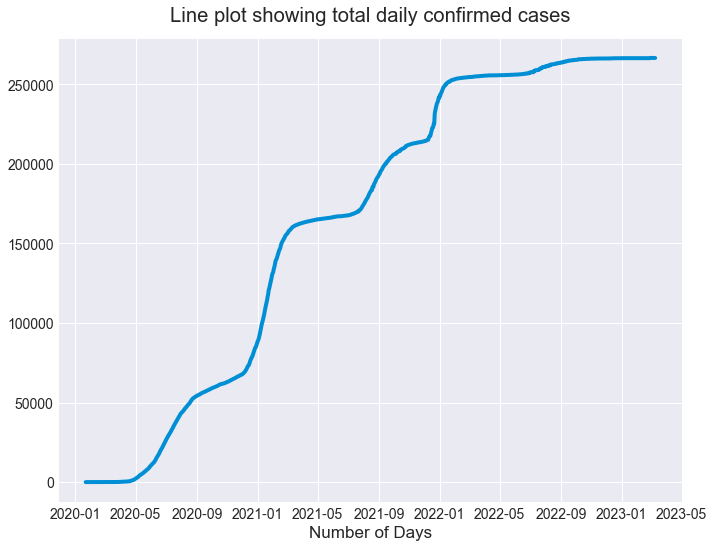

In [68]:
plt.figure(figsize = (10, 8))
plt.plot(global_ng.date, global_ng.confirmed)
plt.title('Line plot showing total daily confirmed cases', y=1.02) 
plt.xlabel('Number of Days', fontsize= 17)
plt.show()

#### *There is a daily increase in number of confirmed cases, hitting above 250,000 in 2022. From september 2022, the number of confirmed cases remained relatively the same all through to January 2023*. 

### **We move on to demonstrate the daily recovery cases**

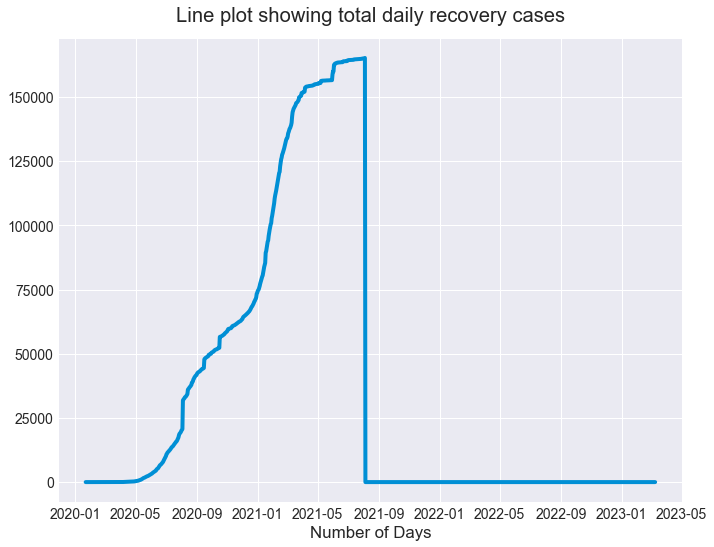

In [69]:
plt.figure(figsize = (10, 8))
plt.plot(global_ng.date, global_ng.recovered);
plt.title('Line plot showing total daily recovery cases', y=1.02) 
plt.xlabel('Number of Days')
plt.show()

#### *A significant increase was recorded in recovered cases between May, 2020 to September, 2022 with more than 150,000 total recovered cases*. 
#### *There was a drop in recovered cases towards September, 2021. No recovered cases was recorded as seen in the global data analysed*.

### **Total daily death cases** 

In [70]:
max_death = global_ng.loc[global_ng['death'].idxmax()]
print("Row with the maximum death rate:")
print(max_death)                          

Row with the maximum death rate:
Province/State                    NaN
Country/Region                Nigeria
Lat                             9.082
Long                           8.6753
date              2022-09-13 00:00:00
confirmed                      264617
recovered                           0
death                            3155
Name: 258807, dtype: object


In [71]:
death_date = max_death['date'].strftime('%Y-%m-%d')
print ("The date with the highest death rate is: {}". format(death_date))

The date with the highest death rate is: 2022-09-13


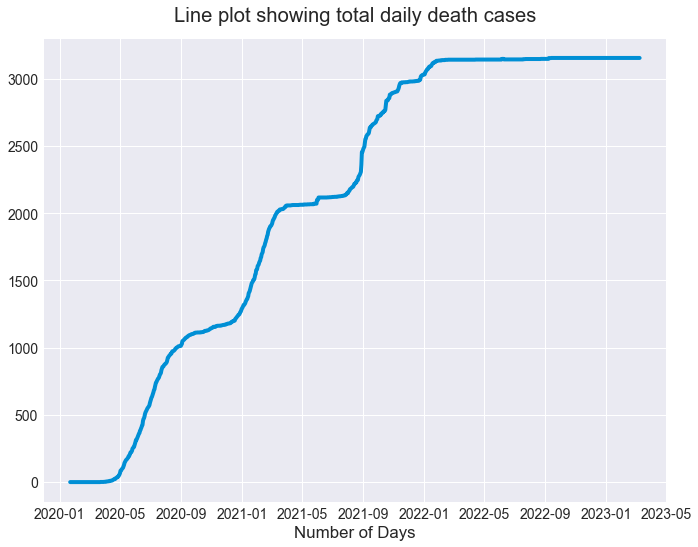

In [72]:
plt.figure(figsize = (10, 8))
plt.plot(global_ng.date, global_ng.death);
plt.title('Line plot showing total daily death cases', y=1.02) 
plt.xlabel('Number of Days')
plt.show()

#### Death cases due to COVID-19 was over 3000 as at January, 2022, with about 3155 death cases recorded on the 13th September, 2022. Death cases has remained relative constant just after 13th September, 2022.

## **We demonstrate the Daily infection rate in the next visualization**

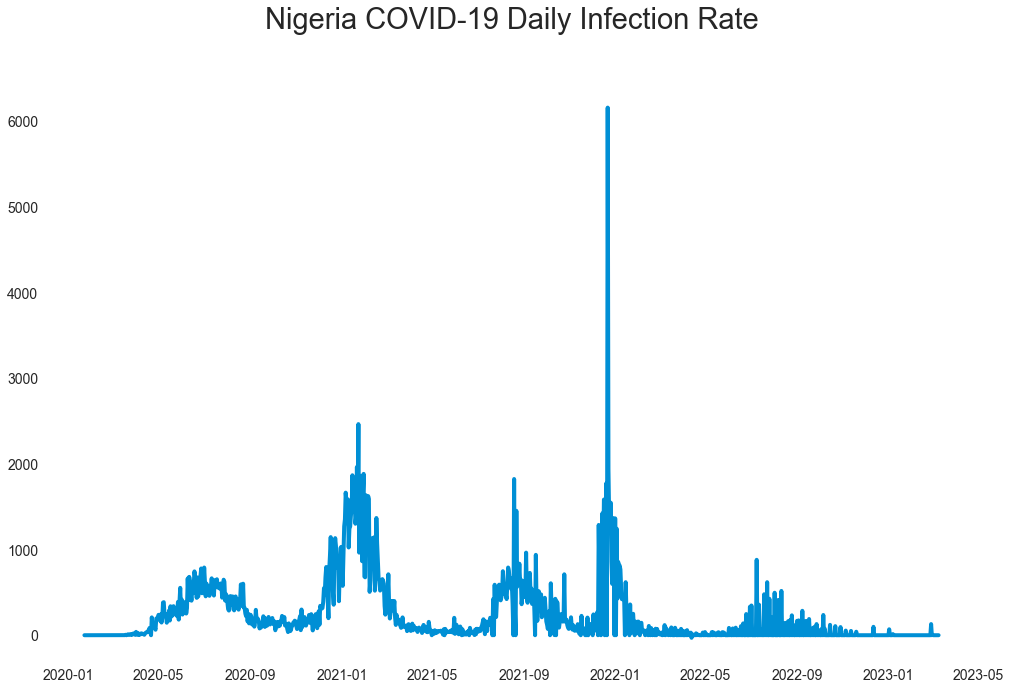

In [73]:
global_ng['infection_rate'] = global_ng.confirmed.diff()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize = (15, 10))
plt.plot(global_ng.date, global_ng.infection_rate);
plt.title('Nigeria COVID-19 Daily Infection Rate',fontsize= 29, y=1.08) 
plt.savefig('daily_infection.png')

plt.show()


In [74]:
# To find the maximum infection infection rate 
infection_max = global_ng.infection_rate.max()
print('The maximum infection rate in a day is: {} '. format(infection_max))

The maximum infection rate in a day is: 6158.0 


In [75]:
# Find the row with the maximum infection rate in the global_ng DataFrame
max_row = global_ng.loc[global_ng['infection_rate'].idxmax()]

In [76]:
print("Row with the maximum infection rate:")
print(max_row)

Row with the maximum infection rate:
Province/State                    NaN
Country/Region                Nigeria
Lat                             9.082
Long                           8.6753
date              2021-12-22 00:00:00
confirmed                      231413
recovered                           0
death                            2991
infection_rate                 6158.0
Name: 187787, dtype: object


In [77]:
max_date = max_row['date'].strftime('%Y-%m-%d')
print ("The date with the highest inection rate is: {}". format(max_date))

The date with the highest inection rate is: 2021-12-22


### Insight: 
#### From the line plot above and analysis, We can infer that the daily infection rate was at its all time high in December,2022. The maximum infection rate was seen on the 12th of december 2022 with about 6158 infection case hitting a total of 231,413 confirmed cases. 

## **Combining the external COVID dataset and our NCDC data to draw more insight**

In [78]:
url.columns

Index(['States Affected', 'positive_cases', 'admission_cases', 'discharged',
       'death'],
      dtype='object')

In [79]:
covidExt_df.columns

Index(['states', 'region', 'Population', 'Overall CCVI Index', 'Age',
       'Epidemiological', 'Fragility', 'Health System', 'Population Density',
       'Socio-Economic', ' Transport Availability', 'Acute IHR'],
      dtype='object')

In [80]:
# rename columns for easy analysis 
url.rename(columns = {'States Affected':'states'}, inplace= True)
# merge dataset 
combined_data = pd.merge(url,covidExt_df, on =['states'])

In [81]:
combined_data.head(6)

,states,positive_cases,admission_cases,discharged,death,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,103145,2,102372,771,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29161,120,28792,249,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,17755,180,17420,155,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11487,20,11378,89,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10328,2,10124,202,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Plateau,10309,27,10207,75,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


In [82]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   35 non-null     object 
 1   positive_cases           35 non-null     int64  
 2   admission_cases          35 non-null     int64  
 3   discharged               35 non-null     int64  
 4   death                    35 non-null     int64  
 5   region                   35 non-null     object 
 6   Population               35 non-null     int64  
 7   Overall CCVI Index       35 non-null     float64
 8   Age                      35 non-null     float64
 9   Epidemiological          35 non-null     float64
 10  Fragility                35 non-null     float64
 11  Health System            35 non-null     float64
 12  Population Density       35 non-null     float64
 13  Socio-Economic           35 non-null     float64
 14   Transport Availability  35 

In [83]:
largest_df = combined_data.nlargest(10, 'positive_cases')

In [84]:
largest_df.columns

Index(['states', 'positive_cases', 'admission_cases', 'discharged', 'death',
       'region', 'Population', 'Overall CCVI Index', 'Age', 'Epidemiological',
       'Fragility', 'Health System', 'Population Density', 'Socio-Economic',
       ' Transport Availability', 'Acute IHR'],
      dtype='object')

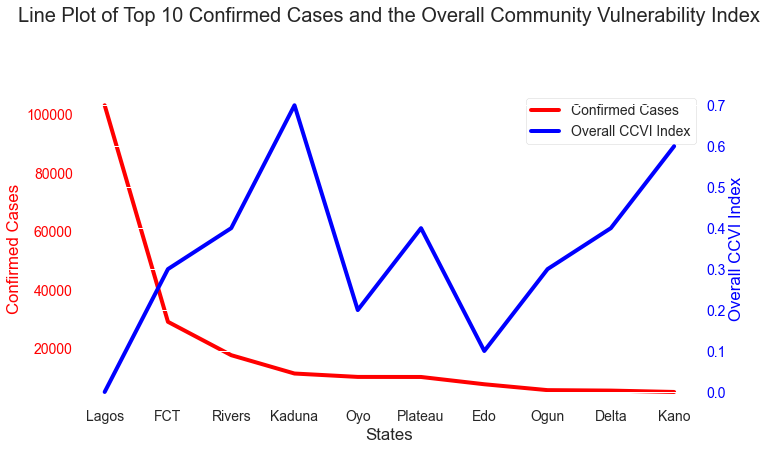

In [85]:


# Extract data
x = largest_df['states']
y1 = largest_df['positive_cases']
y2 = largest_df['Overall CCVI Index']

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))  # Increase figure size to 10 inches wide and 6 inches high
ax2 = ax1.twinx()

# Plot data
curve1 = ax1.plot(x, y1, label='Confirmed Cases', color='r')
curve2 = ax2.plot(x, y2, label='Overall CCVI Index', color='b')

# Set axis labels and legend
ax1.set_xlabel('States')
ax1.set_ylabel('Confirmed Cases', color='r')
ax2.set_ylabel('Overall CCVI Index', color='b')
ax1.tick_params(axis='y', labelcolor='r')
ax2.tick_params(axis='y', labelcolor='b')
curves = curve1 + curve2
labels = [curve.get_label() for curve in curves]
ax1.legend(curves, labels, loc='best')

# Set title
plt.title('Line Plot of Top 10 Confirmed Cases and the Overall Community Vulnerability Index', fontsize=20, y=1.2)

# Adjust x-axis parameters to prevent overlapping
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.subplots_adjust(bottom=0.15)  # Increase bottom margin to prevent x-axis labels from getting cut off

# Show plot
plt.show()


#### Understanding the relationship between community vulnerability and confirmed cases of COVID-19 is important for developing effective public health interventions and policies to prevent the spread of the disease and protect vulnerable communities.
#### From the visualisation above, Kaduna and kano has a significantly high vulnerability index with low rate of spread of the COVID virus while Lagos has a low overall community vulnerability index and a high number of confirmed cases, this may indicate that the disease is spreading rapidly despite the lower vulnerability of the community.
#### Appropriate public health intervention will be needed to check states like Kano and Kaduna to ensure proper testing is being carried out. There is a need to create and enforce policies to checkmate the rate of spread of the COVID virus in Lagos   






## **Examination of the relationship between health systems, population density and confirmed COVID-19 cases**

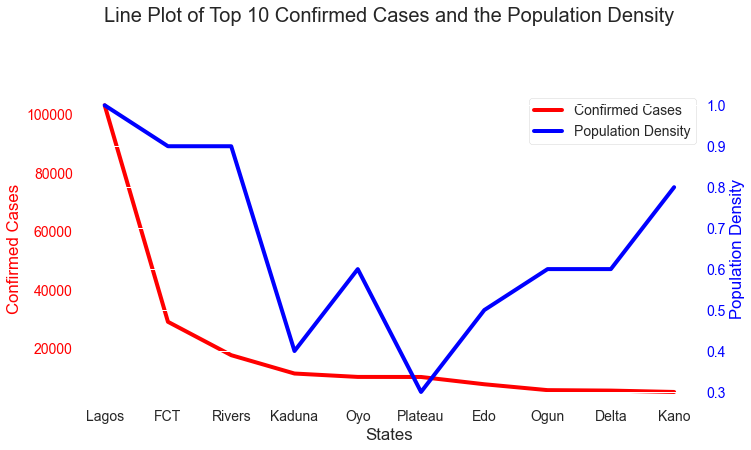

In [86]:
# Extract data
x = largest_df['states']
y1 = largest_df['positive_cases']
y2 = largest_df['Population Density']

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6)) 
ax2 = ax1.twinx()

# Plot data
curve1 = ax1.plot(x, y1, label='Confirmed Cases', color='r')
curve2 = ax2.plot(x, y2, label='Population Density', color='b')

# Set axis labels and legend
ax1.set_xlabel('States')
ax1.set_ylabel('Confirmed Cases', color='r')
ax2.set_ylabel('Population Density', color='b')
ax1.tick_params(axis='y', labelcolor='r')
ax2.tick_params(axis='y', labelcolor='b')
curves = curve1 + curve2
labels = [curve.get_label() for curve in curves]
ax1.legend(curves, labels, loc='best')

# Set title
plt.title('Line Plot of Top 10 Confirmed Cases and the Population Density', fontsize=20, y=1.2)

# Adjust x-axis parameters to prevent overlapping
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.subplots_adjust(bottom=0.15)  # Increase bottom margin to prevent x-axis labels from getting cut off

# Show plot
plt.show()

#### *From the plot, We do see some direct correlation between the population density and the number of confirmed cases per state. Further than the slope, we notice the number of cases confirmed cases were not entirely dependent on the population density as some states with high population density was seen to have lower number of confirmed COVID cases. This could be as a result of the states observing good public health polices or there was not enough data got or testing done in that region*.

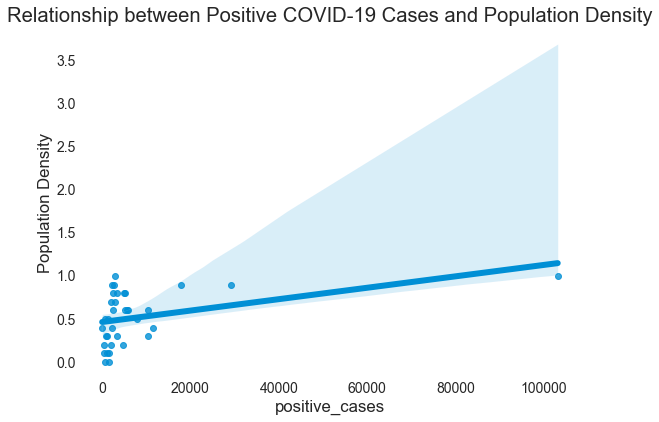

In [87]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a regression plot with positive cases as the x-axis and population density as the y-axis
sns.regplot(x="positive_cases", y="Population Density", data=combined_data)

# Set the plot title
plt.title("Relationship between Positive COVID-19 Cases and Population Density")

# Show the plot
plt.show()


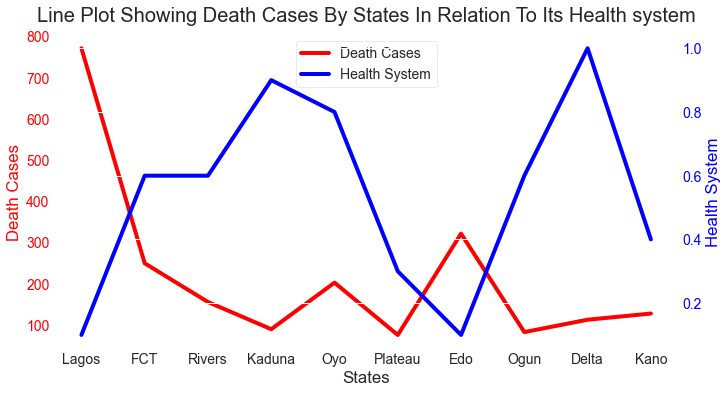

In [88]:
x = largest_df['states']
y1 = largest_df['death']
y2 = largest_df['Health System']

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))  # Increase figure size to 10 inches wide and 6 inches high
ax2 = ax1.twinx()

# Plot data
curve1 = ax1.plot(x, y1, label='Death Cases', color='r')
curve2 = ax2.plot(x, y2, label='Health System', color='b')

# Set axis labels and legend
ax1.set_xlabel('States')
ax1.set_ylabel('Death Cases', color='r')
ax2.set_ylabel('Health System', color='b')
ax1.tick_params(axis='y', labelcolor='r')
ax2.tick_params(axis='y', labelcolor='b')
curves = curve1 + curve2
labels = [curve.get_label() for curve in curves]
ax1.legend(curves, labels, loc=9)

# Set title
plt.title('Line Plot Showing Death Cases By States In Relation To Its Health system', fontsize=20, y=1.02)

# Adjust x-axis parameters to prevent overlapping
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.subplots_adjust(bottom=0.15)  # Increase bottom margin to prevent x-axis labels from getting cut off

# Show plot
plt.show()

### Insight:
#### The data shows that more death cases were recorded in states with low or insufficient health systems. States like Lagos and Edo with similar level of health system recorded high death compared to states like Delta and Kaduna.

## **Determine the effect of the Pandemic on the economy**

In [89]:
# we explore the dataset to get a glimpse of what we working with
gdp_df

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


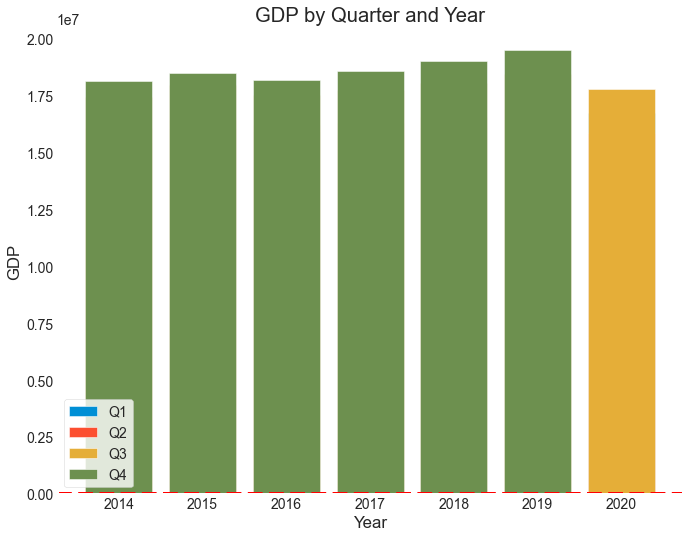

In [90]:

# melt the dataframe to create the plot dataframe
plot_df = pd.melt(gdp_df, id_vars=['Year'], value_vars=['Q1', 'Q2', 'Q3', 'Q4'], var_name='Quarter', value_name='GDP')

# create the barplot with subplots of each quarter
fig, ax = plt.subplots(figsize=(10,8))
for i, quarter in enumerate(['Q1', 'Q2', 'Q3', 'Q4']):
    ax.bar(plot_df[plot_df['Quarter'] == quarter]['Year'], plot_df[plot_df['Quarter'] == quarter]['GDP'], label=quarter)
ax.legend(loc='lower left')

# draw a horizontal line through the graph at the value of Q2 2020
ax.axhline(y=7, color='r', linestyle='--')

# set the x-axis label, y-axis label, and plot title
ax.set_xlabel('Year')
ax.set_ylabel('GDP')
ax.set_title('GDP by Quarter and Year')

plt.show()


#### There was a drop in GDP in the third quarter of 2020. This indicates the negative effect the pandemic had on the economy. 

## Exploring states budget in the COVID pandemic period

In [91]:
budget_df.head(4)

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80


In [92]:
budget_df.columns


Index(['states', 'Initial_budget (Bn)', 'Revised_budget (Bn)'], dtype='object')

In [93]:
budget_df.rename(columns={'Initial_budget (Bn)': 'initial_budget', 'Revised_budget (Bn)': 'revised_budget'}, inplace=True)


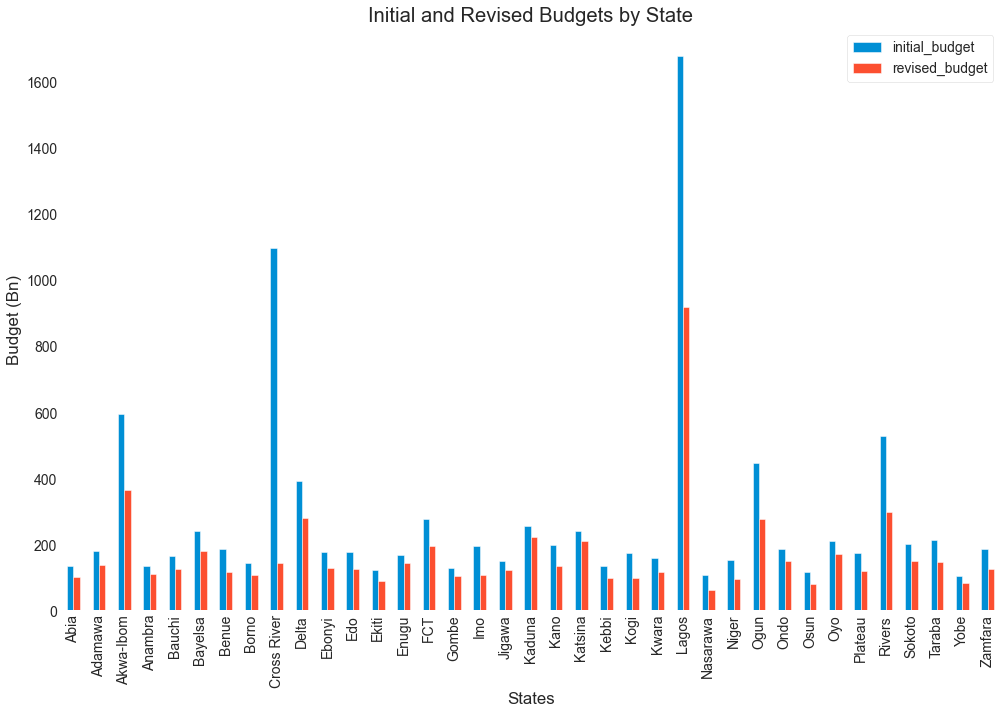

In [94]:
budget_grouped = budget_df.groupby('states')[['initial_budget', 'revised_budget']].sum()

# Plot the data
budget_grouped.plot(kind='bar', figsize=(15, 10))

# Add axis labels and title
plt.xlabel('States')
plt.ylabel('Budget (Bn)')
plt.title('Initial and Revised Budgets by State')

# Show the plot
plt.show()

#### Due to the economic impact of the COVID-19 pandemic across the country, it was observed from the above visualisation that all the states had their budgets revised. No state had the revised budget above the initial one. This goes to show how critical the pandemic affected lives across the country. 

In [97]:
global_ng['death_rate'] = global_ng.death.diff()
global_ng.to_csv('global_covid.csv', index = True)